# Unstructured Parsing Pipeline

This notebook demonstrates the complete Unstructured parsing pipeline for PDF documents, including:
- Document parsing with element extraction
- Image processing with AI summarization
- Title-based text chunking
- Performance timing and analysis

## Setup and Imports

We add the following cell so that i can apply the changes without having to restart the kernel

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import nest_asyncio

nest_asyncio.apply()

In [1]:
import sys
import os
from pathlib import Path
import time
import json
from typing import Dict, Any

# Add the src directory to Python path
sys.path.append('../src/')

#from simple_rag.parsers.unstructured_parser import UnstructuredParserProcessor


## Configuration

Set up the input PDF file and output directory for processing.

In [ ]:
# Configuration

PDF_FILE = "../data/output/Energy_Fund_Admiral__factSheet.pdf"  # Change this to your PDF file
OUTPUT_DIR = Path("../data/processed")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
print(f"📄 Input PDF: {PDF_FILE}")
print(f"📁 Output directory: {OUTPUT_DIR}")
print(f"✅ PDF exists: {os.path.exists(PDF_FILE)}")

📄 Input PDF: ../data/output/Energy_Fund_Admiral__factSheet.pdf
📁 Output directory: ../data/processed
✅ PDF exists: True


## Initialize Unstructured Parser

Create the UnstructuredParserProcessor instance with AI image processing enabled.

In [5]:
# Initialize the Unstructured parser

from simple_rag.parsers.unstructured_parser import UnstructuredParserProcessor

parser = UnstructuredParserProcessor()
print("🔧 Unstructured parser initialized")


🔧 Unstructured parser initialized


## Document Parsing

Parse the PDF document and extract all elements including text, images, and tables.

In [6]:
# Start timing
start_time = time.time()

print("🚀 Starting Unstructured parsing...")
print("=" * 50)

# Parse the document
chunks = parser.parse_document(PDF_FILE, verbose=True)

parsing_time = time.time() - start_time
print(f"\n⏱️  Raw parsing completed in {parsing_time:.2f} seconds")
print(f"📊 Total chunks extracted: {len(chunks)}")

🚀 Starting Unstructured parsing...
[unstructured] parsing document: ../data/output/Energy_Fund_Admiral__factSheet.pdf


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


[unstructured] extracted 10 elements
[unstructured] element type breakdown:
  - CompositeElement: 10

⏱️  Raw parsing completed in 15.66 seconds
📊 Total chunks extracted: 10


## Content Analysis

Analyze the extracted content by type (text, images, tables) before preprocessing.

As we can see it is struggling to detect some of the content of the tables in the document

### Preprocessing 

In [7]:
import subprocess

subprocess.Popen(["ollama","serve"])

<Popen: returncode: None args: ['ollama', 'serve']>

In [8]:



preprocess_start = time.time()

print("\n🔄 Starting Title-based preprocessing...")
print("=" * 40)
model = "gemma3:4b"
# Preprocess chunks with Title-based grouping and AI image processing
processed_content = parser.preprocess_chunks(chunks,verbose = True, document_path=PDF_FILE, model=model)

preprocess_time = time.time() - preprocess_start
total_time = time.time() - start_time

print(f"\n⏱️  Preprocessing completed in {preprocess_time:.2f} seconds")
print(f"⏱️  Total processing time: {total_time:.2f} seconds")


🔄 Starting Title-based preprocessing...
🖼️  Processing image in chunk 1 on page 1
   ✓ Generated summary: [Image analysis error: Failed to connect to Ollama. Please check that Ollama is downloaded, running ...
🖼️  Processing image in chunk 5 on page 2
   ✓ Generated summary: [Image analysis error: Failed to connect to Ollama. Please check that Ollama is downloaded, running ...
📊 Title-based preprocessing results:
   Title-based chunks: 19
   Image chunks: 2
     Chunk 0: No title (1 elements)
     Chunk 1: Vanguard’ (1 elements)
     Chunk 2: VanguardEnergy Fund (2 elements)
     Chunk 3: Fund facts (2 elements)
     Chunk 4: Investment objective (1 elements)
     Chunk 5: Benchmark (3 elements)
     Chunk 6: Growth of a $10,000 investment: January 31, 2015— ... (1 elements)
     Chunk 7: Investment strategy (7 elements)
     Chunk 8: Annual returns (3 elements)
     Chunk 9: Total returns (7 elements)
     Chunk 10: vanguard.com/performance . The performance of an i... (5 elements)
 

In [9]:
processed_content

{'text_chunks': [{'chunk_id': 'title_chunk_0',
   'page': 1,
   'text_elements': [{'element_type': 'Header',
     'text': 'Fact sheet | June 30, 2025',
     'page': 1,
     'original_chunk_id': 0,
     'element_id': 'chunk-0-elem-0'}],
   'combined_text': 'Fact sheet | June 30, 2025',
   'section_title': 'No Title',
   'source_document': 'Energy_Fund_Admiral__factSheet.pdf'},
  {'chunk_id': 'title_chunk_1',
   'page': 1,
   'text_elements': [{'element_type': 'Title',
     'text': 'Vanguard’',
     'page': 1,
     'original_chunk_id': 0,
     'element_id': 'chunk-0-elem-1'}],
   'combined_text': 'Vanguard’',
   'section_title': 'Vanguard’',
   'source_document': 'Energy_Fund_Admiral__factSheet.pdf'},
  {'chunk_id': 'title_chunk_2',
   'page': 1,
   'text_elements': [{'element_type': 'Title',
     'text': 'VanguardEnergy Fund',
     'page': 1,
     'original_chunk_id': 0,
     'element_id': 'chunk-0-elem-2'},
    {'element_type': 'NarrativeText',
     'text': 'Sector fund | Admiral™ Shar

In [10]:
# Display results summary
print("\n📊 FINAL RESULTS SUMMARY")
print("=" * 50)

summary = processed_content.get('summary', {})
text_chunks = processed_content.get('text_chunks', [])
image_chunks = processed_content.get('image_chunks', [])

print(f"📄 Document: {os.path.basename(PDF_FILE)}")
print(f"⏱️  Total Processing Time: {total_time:.2f} seconds")
print(f"   - Raw Parsing: {parsing_time:.2f}s")
print(f"   - Preprocessing: {preprocess_time:.2f}s")
print()
print(f"📋 Content Summary:")
print(f"   - Title-based text chunks: {summary.get('text_chunks_count', 0)}")
print(f"   - Image chunks (with AI): {summary.get('image_chunks_count', 0)}")
print(f"   - Total chunks: {summary.get('total_chunks', 0)}")
print()

# Show sample of text chunks
print(f"📝 Sample Text Chunks:")
for i, chunk in enumerate(text_chunks[:3]):
    title_elem = next((elem for elem in chunk['text_elements'] if elem['element_type'] == 'Title'), None)
    title = title_elem['text'] if title_elem else 'No title'
    element_count = len(chunk['text_elements'])
    text_preview = chunk['combined_text'][:100] + "..." if len(chunk['combined_text']) > 100 else chunk['combined_text']
    print(f"   Chunk {i+1}: '{title}' ({element_count} elements)")
    print(f"      Preview: {text_preview}")
    print()

# Show image chunks if any
if image_chunks:
    print(f"🖼️  Image Chunks with AI Summaries:")
    for i, img_chunk in enumerate(image_chunks[:3]):
        page = img_chunk.get('page', 'Unknown')
        summary = img_chunk.get('ai_summary', 'No summary')
        print(f"   Image {i+1} (Page {page}): {summary[:100]}...")


📊 FINAL RESULTS SUMMARY
📄 Document: Energy_Fund_Admiral__factSheet.pdf
⏱️  Total Processing Time: 15.82 seconds
   - Raw Parsing: 15.66s
   - Preprocessing: 0.01s

📋 Content Summary:
   - Title-based text chunks: 19
   - Image chunks (with AI): 2
   - Total chunks: 21

📝 Sample Text Chunks:
   Chunk 1: 'No title' (1 elements)
      Preview: Fact sheet | June 30, 2025

   Chunk 2: 'Vanguard’' (1 elements)
      Preview: Vanguard’

   Chunk 3: 'VanguardEnergy Fund' (2 elements)
      Preview: VanguardEnergy Fund
Sector fund | Admiral™ Shares

🖼️  Image Chunks with AI Summaries:
   Image 1 (Page 1): [Image analysis error: Failed to connect to Ollama. Please check that Ollama is downloaded, running ...
   Image 2 (Page 2): [Image analysis error: Failed to connect to Ollama. Please check that Ollama is downloaded, running ...


Save the parsed results

In [11]:
# Save results to file
output_filename = f"{Path(PDF_FILE).stem}_unstructured_notebook.json"
output_path = OUTPUT_DIR / output_filename

with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(processed_content, f, indent=2, ensure_ascii=False)

print(f"\n💾 Results saved to: {output_path}")
print(f"📁 File size: {output_path.stat().st_size / 1024:.1f} KB")

# Verify the saved file
with open(output_path, 'r', encoding='utf-8') as f:
    saved_data = json.load(f)
    
print(f"✅ File verification: {len(saved_data.get('text_chunks', []))} text chunks, {len(saved_data.get('image_chunks', []))} image chunks")


💾 Results saved to: ../data/processed/Energy_Fund_Admiral__factSheet_unstructured_notebook.json
📁 File size: 60.4 KB
✅ File verification: 19 text chunks, 2 image chunks


## Docling IBM Library for parsing documents

As we are going to see next the Docling Library excels in parsing documents with tables and images and compared to the unstructured library it achieves more accuracy.

In [24]:
from docling.document_converter import DocumentConverter
PDF_FILE = "../data/output/S&P_500_ETF_factSheet.pdf" 
source = PDF_FILE  # document per local path or URL
converter = DocumentConverter()
result = converter.convert(source)
print(result.document.export_to_markdown())

2025-10-02 14:03:24,292 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-02 14:03:24,296 - INFO - Going to convert document batch...
2025-10-02 14:03:24,297 - INFO - Initializing pipeline for StandardPdfPipeline with options hash e647edf348883bed75367b22fbe60347
2025-10-02 14:03:24,298 - INFO - Accelerator device: 'cuda:0'
2025-10-02 14:03:27,397 - INFO - Accelerator device: 'cuda:0'
2025-10-02 14:03:28,616 - INFO - Accelerator device: 'cuda:0'
2025-10-02 14:03:29,448 - INFO - Processing document S&P_500_ETF_factSheet.pdf
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x71eb3a205780>>
Traceback (most recent call last):
  File "/home/alvar/anaconda3/envs/rag-env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
2025-10-02 14:03:32,243 - INFO - Finished converting document S&P_500_ETF_factSheet.pdf 

## Vanguard S&amp;P 500 ETF    |  VOO

As of June 30, 2025

## Investment approach

- Seeks to track the performance of the S&amp;P 500 Index.
- Large-cap equity.
- Employs a passively managed, full-replication  strategy.
- Fund remains fully invested.
- Low expenses minimize net tracking error.

## About the benchmark

- The S&amp;P 500 Index is a widely recognized benchmark of U.S. stock market performance that is dominated by the stocks of large U.S. companies.
- The index includes 500 leading companies in leading industries of the U.S. economy.

## Performance history

Total returns   2  for period ended June 30, 2025

| VOO(Inception 2010-09-07)      | Quarter   | Year to date   | 1 year   | 3 years   | 5 years   | 10 years   | Since inception   |
|--------------------------------|-----------|----------------|----------|-----------|-----------|------------|-------------------|
| Net asset value (NAV) return 3 | 10.94%    | 6.19%          | 15.13%   | 19.67%    | 16.60%    | 13.61%

In [3]:

# Export to markdown
print("=== MARKDOWN OUTPUT ===")
print(result.document.export_to_markdown())
markdown_output = result.document.export_to_markdown()

# Check if images were extracted
print(f"\n=== IMAGE ANALYSIS ===")
print(f"Number of pages: {len(result.document.pages)}")

# Count extracted images
picture_count = 0
table_count = 0

images = []
for element, _level in result.document.iterate_items():
    if hasattr(element, 'get_image'):
        if 'picture' in str(type(element)).lower():
            picture_count += 1
            images.append(element)
        elif 'table' in str(type(element)).lower():
            table_count += 1
            if table_count == 1:
                images.append(element)

print(f"Pictures found: {picture_count}")
print(f"Tables found: {table_count}")

=== MARKDOWN OUTPUT ===
## Vanguard S&amp;P 500 ETF    |  VOO

As of June 30, 2025

## Investment approach

- Seeks to track the performance of the S&amp;P 500 Index.
- Large-cap equity.
- Employs a passively managed, full-replication  strategy.
- Fund remains fully invested.
- Low expenses minimize net tracking error.

## About the benchmark

- The S&amp;P 500 Index is a widely recognized benchmark of U.S. stock market performance that is dominated by the stocks of large U.S. companies.
- The index includes 500 leading companies in leading industries of the U.S. economy.

## Performance history

Total returns   2  for period ended June 30, 2025

| VOO(Inception 2010-09-07)      | Quarter   | Year to date   | 1 year   | 3 years   | 5 years   | 10 years   | Since inception   |
|--------------------------------|-----------|----------------|----------|-----------|-----------|------------|-------------------|
| Net asset value (NAV) return 3 | 10.94%    | 6.19%          | 15.13%   | 19.67%

### Image

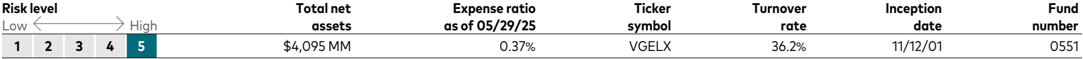

--------------------------------------------------


### Image

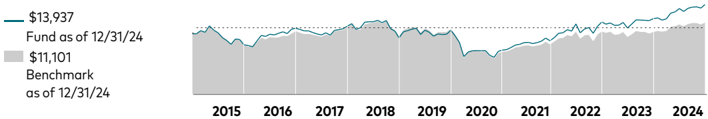

--------------------------------------------------


### Image

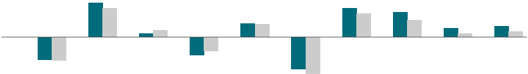

--------------------------------------------------


### Image

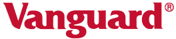

--------------------------------------------------


### Image

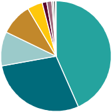

--------------------------------------------------


In [31]:

from IPython.display import display, Markdown
from PIL import Image
from io import BytesIO

images_to_process = []

# We add the first table to extract the risk of the fund
images_to_process.append(images[0].get_image(result.document))


# Using your existing 'images' list from the previous code
for i, element in enumerate(images):
    element_type = str(type(element)).lower()
    if 'picture' in element_type :
        
        # Display the image
        try:
            image_data = element.get_image(result.document)
            
                
            if image_data.size[0] > 30:
                images_to_process.append(image_data)
        except Exception as e: 
            print(f"Error: {e}")
    

for image in images_to_process:
        display(Markdown("### Image"))
        display(image)
        print("-" * 50)

Now lets try to use a more advanced approach introducing some options in the parsing process.

Lets process the images with the local visual model

In [ ]:
import subprocess

subprocess.Popen(["ollama","serve"])

<Popen: returncode: None args: ['ollama', 'serve']>

Error: listen tcp 127.0.0.1:11434: bind: address already in use


Lets now try and obtain the main information about the risk of the fund

As we can se the best model analyzing the content of the image is the llama3.2-vision

Lets now iterate through each of the factSheet documents of the funds and etfs in order to generate the parsed data

There are two types of products:

- ETFs
- Mutual Funds

Lets generate now the markdown parses of the factSheet documents

In [6]:
from pathlib import Path
folder = Path("../data/output")
fact_sheets = []
for pdf in folder.glob("*.pdf"):
    if "factsheet" in pdf.name.lower():
        fact_sheets.append(pdf)


print(len(fact_sheets))



507


Lets analyze for the two different types of documents the different images and tables and parses that are generated before applying it to the whole database

2025-10-04 14:26:27,109 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-04 14:26:27,113 - INFO - Going to convert document batch...
2025-10-04 14:26:27,114 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-10-04 14:26:27,115 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:26:30,144 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:26:31,643 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:26:36,109 - INFO - Processing document Value_Index_Fund_Investor__factSheet.pdf
2025-10-04 14:26:40,454 - INFO - Finished converting document Value_Index_Fund_Investor__factSheet.pdf in 13.35 sec.


Pictures found: 10
Tables found: 5


### Image

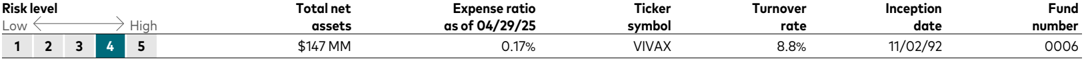

--------------------------------------------------


### Image

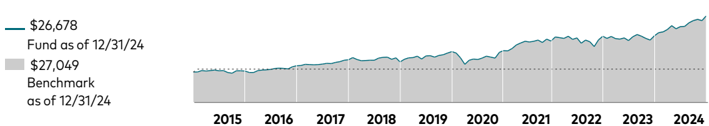

--------------------------------------------------


### Image

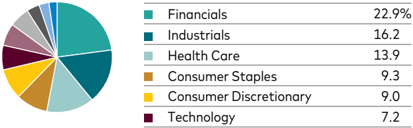

--------------------------------------------------


IndexError: pop from empty list

In [20]:
etf_path = "../data/output/S&P_500_ETF_factSheet.pdf"
fund_path = "../data/output/Value_Index_Fund_Investor__factSheet.pdf"


import time
from pathlib import Path
from docling.datamodel.base_models import InputFormat
from docling_core.types.doc import ImageRefMode
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.pipeline_options import PdfPipelineOptions, TableFormerMode, EasyOcrOptions, TesseractOcrOptions, OcrMacOptions
from docling.datamodel.settings import settings
from IPython.display import display, Markdown

import fitz  # PyMuPDF
from pypdfium2._helpers.misc import PdfiumError
from io import BytesIO


IMAGE_RESOLUTION_SCALE = 2.0

# Define pipeline options for PDF processing
pipeline_options = PdfPipelineOptions(
    do_table_structure=True,  
     
    
    table_structure_options=dict(
        do_cell_matching=True,  # Use text cells predicted from table structure model
        mode=TableFormerMode.ACCURATE  # Use more accurate TableFormer model
    ),
    generate_page_images=True,  # Enable page image generation
    generate_picture_images=True,  # Enable picture image generation
    images_scale=IMAGE_RESOLUTION_SCALE, # Set image resolution scale (scale=1 corresponds to a standard 72 DPI image)
   
    
)

# Initialize the DocumentConverter with the specified pipeline options
doc_converter_global = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)


try:
    result = doc_converter_global.convert(fund_path)
except Exception as e:
    try:
        # Open with PyMuPDF and save to an in-memory buffer
        pdf_bytes = Path(fund_path).read_bytes()
        pdf_doc = fitz.open(stream=pdf_bytes, filetype="pdf")
        
        output_buffer = BytesIO()
        pdf_doc.save(output_buffer)
        output_buffer.seek(0)
        
        # Retry conversion with the repaired PDF bytes
        result = doc_converter_global.convert(output_buffer)
        
    except Exception as e_inner:
        
        raise e_inner # Re-raise the exception if the fallback also fails

    


# Count extracted images
picture_count = 0
table_count = 0

images = []
for element, _level in result.document.iterate_items():
    if hasattr(element, 'get_image'):
        if 'picture' in str(type(element)).lower():
            picture_count += 1
            images.append(element)
        elif 'table' in str(type(element)).lower():
            table_count += 1
            if table_count == 1:
                images.append(element)

print(f"Pictures found: {picture_count}")
print(f"Tables found: {table_count}")

from simple_rag.parsers.docling_parser import DoclingParserProcessor
from IPython.display import display, Markdown
docling_parser = DoclingParserProcessor()
# Display the images

from IPython.display import Image
summaries = []
for image in [images[0], images[1], images[4]]:
        display(Markdown("### Image"))
        display(image.get_image(result.document))
        #summaries.append(docling_parser.obtain_image_summary(image.get_image(result.document)))
        print("-" * 50)

text = result.document.export_to_markdown()


# Now lets add below the image labels the corresponding summary


image_tag = '<!-- image -->'

parts = text.split(image_tag)
target_parts = [1,3,5]
result_parts = []
for i, part in enumerate(parts):
    if i in target_parts:
        result_parts.append(part +image_tag + "\n\n" + summaries.pop(0))
    else:
        result_parts.append(part)


print("\n\n".join(result_parts))
text = "\n\n".join(result_parts)


Lets try to accelerate the process of the summary by obtaining directly the part with the risk of the fund

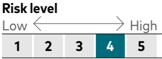

In [24]:

from IPython.display import display
from PIL import Image
summaries = []

image = images[0].get_image(result.document)

width, height = image.size

left = 0
upper = 0
right = int(width * 0.15) # Calculate 25% of the width
lower = height

# Define the box
crop_box = (left, upper, right, lower)

# --- 3. Crop the image ---
cropped_image = image.crop(crop_box)
display(cropped_image)

Lets create the training class

In [ ]:
import time
from pathlib import Path
from docling.datamodel.base_models import InputFormat
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.pipeline_options import PdfPipelineOptions, TableFormerMode
from tqdm import tqdm
import fitz  # PyMuPDF
from io import BytesIO

def parse_document(doc_path: Path):
    """Parses a single PDF document using Docling with a PyMuPDF fallback."""
    # This setup can be defined once outside the function if preferred
    pipeline_options = PdfPipelineOptions(
        do_table_structure=True,
        table_structure_options=dict(do_cell_matching=True, mode=TableFormerMode.ACCURATE),
        generate_page_images=True,
        generate_picture_images=True,
        images_scale=2.0
    )
    doc_converter = DocumentConverter(
        format_options={InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)}
    )

    try:
        return doc_converter.convert(doc_path)
    except Exception:
        # Fallback to repair the PDF if the first attempt fails
        pdf_bytes = Path(doc_path).read_bytes()
        pdf_doc = fitz.open(stream=pdf_bytes, filetype="pdf")
        output_buffer = BytesIO()
        pdf_doc.save(output_buffer)
        output_buffer.seek(0)
        return doc_converter.convert(output_buffer)

def extract_images_for_labeling(input_folder: str, output_folder: str, crop_width_percent: float = 0.25):
    """
    Finds all relevant PDFs, parses them, crops the target image, and saves it for later labeling.
    """
    input_path = Path(input_folder)
    output_images_path = Path(output_folder) / "unlabeled_images"
    output_images_path.mkdir(parents=True, exist_ok=True)

    all_pdfs = input_path.glob("*.pdf")

    # Filter for files where the name contains BOTH "factsheet" and "fund"
    # We use .lower() to make the search case-insensitive
    files_to_process = [
        f for f in all_pdfs 
        if "factsheet" in f.name.lower() and "fund" in f.name.lower()
    ]
    print(f"Found {len(files_to_process)} documents to process.")

    for doc_path in tqdm(files_to_process, desc="Extracting Images"):
        try:
            result = parse_document(doc_path)
            
            # Your logic to find the target image (first table)
            target_image = None
            table_count = 0
            for element, _level in result.document.iterate_items():
                if 'table' in str(type(element)).lower():
                    table_count += 1
                    if table_count == 1:
                        target_image = element.get_image(result.document)
                        break
            
            if target_image:
                width, height = target_image.size
                crop_box = (0, 0, int(width * crop_width_percent), height)
                cropped_image = target_image.crop(crop_box)
                
                # Save the cropped image to the 'unlabeled' folder
                image_filename = f"{doc_path.stem}_risk_gauge.png"
                cropped_image.save(output_images_path / image_filename)
            else:
                tqdm.write(f"WARNING: No target table/image found in {doc_path.name}")

        except Exception as e:
            tqdm.write(f"ERROR processing {doc_path.name}: {e}")

    print("\n--- Image Extraction Complete! ---")
    print(f"Check the '{output_images_path}' folder for images to label.")

# --- Run the Extraction Script ---
INPUT_FOLDER = "../data/output/"  # Folder with all your PDFs
OUTPUT_FOLDER = "train_dataset"
extract_images_for_labeling(INPUT_FOLDER, OUTPUT_FOLDER)

Found 950 documents to process.


Extracting Images:   0%|          | 0/950 [00:00<?, ?it/s]2025-10-04 14:56:23,438 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-04 14:56:23,446 - INFO - Going to convert document batch...
2025-10-04 14:56:23,447 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-10-04 14:56:23,448 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:56:25,232 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:56:26,026 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:56:26,381 - INFO - Processing document Intermediate-Term_Bond_Index_Fund_Institutional__semiAnnualReport.pdf
2025-10-04 14:56:27,077 - INFO - Finished converting document Intermediate-Term_Bond_Index_Fund_Institutional__semiAnnualReport.pdf in 3.64 sec.
Extracting Images:   0%|          | 1/950 [00:03<58:03,  3.67s/it]2025-10-04 14:56:27,103 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-04 14:56:27,108 - INFO - Going to convert document batch...


KeyboardInterrupt: 

Processing Documents:   0%|          | 0/297 [00:00<?, ?it/s]2025-10-04 14:50:39,438 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-04 14:50:39,441 - INFO - Going to convert document batch...
2025-10-04 14:50:39,442 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-10-04 14:50:39,443 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:50:41,238 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:50:42,051 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:50:42,422 - INFO - Processing document Value_Index_Fund_Investor__factSheet.pdf
2025-10-04 14:50:44,409 - INFO - Finished converting document Value_Index_Fund_Investor__factSheet.pdf in 4.97 sec.


Processing: Value_Index_Fund_Investor__factSheet.pdf


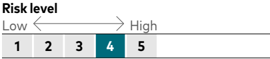

Processing Documents:   0%|          | 1/297 [00:06<34:03,  6.90s/it]2025-10-04 14:50:46,345 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-04 14:50:46,348 - INFO - Going to convert document batch...
2025-10-04 14:50:46,349 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-10-04 14:50:46,350 - INFO - Accelerator device: 'cuda:0'


SAVED: Value_Index_Fund_Investor__factSheet_risk_gauge.png with label 4


2025-10-04 14:50:48,005 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:50:48,815 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:50:49,275 - INFO - Processing document High_Dividend_Yield_Index_Fund_Admiral__factSheet.pdf
2025-10-04 14:50:51,230 - INFO - Finished converting document High_Dividend_Yield_Index_Fund_Admiral__factSheet.pdf in 4.89 sec.


Processing: High_Dividend_Yield_Index_Fund_Admiral__factSheet.pdf


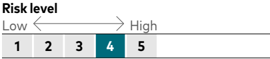

Processing Documents:   1%|          | 2/297 [00:13<31:55,  6.49s/it]2025-10-04 14:50:52,552 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-04 14:50:52,564 - INFO - Going to convert document batch...
2025-10-04 14:50:52,565 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-10-04 14:50:52,566 - INFO - Accelerator device: 'cuda:0'


SAVED: High_Dividend_Yield_Index_Fund_Admiral__factSheet_risk_gauge.png with label 4


2025-10-04 14:50:54,185 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:50:54,993 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:50:55,488 - INFO - Processing document Diversified_Equity_Fund_factSheet.pdf
2025-10-04 14:50:57,058 - INFO - Finished converting document Diversified_Equity_Fund_factSheet.pdf in 4.51 sec.


Processing: Diversified_Equity_Fund_factSheet.pdf


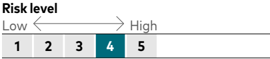

Processing Documents:   1%|          | 3/297 [00:19<32:01,  6.54s/it]2025-10-04 14:50:59,135 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-04 14:50:59,142 - INFO - Going to convert document batch...
2025-10-04 14:50:59,143 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-10-04 14:50:59,143 - INFO - Accelerator device: 'cuda:0'


SAVED: Diversified_Equity_Fund_factSheet_risk_gauge.png with label 4


2025-10-04 14:51:00,775 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:51:02,016 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:51:02,499 - INFO - Processing document Financials_Index_Fund_Admiral__factSheet.pdf
2025-10-04 14:51:04,589 - INFO - Finished converting document Financials_Index_Fund_Admiral__factSheet.pdf in 5.46 sec.


Processing: Financials_Index_Fund_Admiral__factSheet.pdf


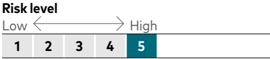

Processing Documents:   1%|▏         | 4/297 [00:27<33:49,  6.93s/it]2025-10-04 14:51:06,662 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-04 14:51:06,667 - INFO - Going to convert document batch...
2025-10-04 14:51:06,668 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-10-04 14:51:06,669 - INFO - Accelerator device: 'cuda:0'


SAVED: Financials_Index_Fund_Admiral__factSheet_risk_gauge.png with label 5


2025-10-04 14:51:08,401 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:51:09,171 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:51:09,526 - INFO - Processing document Short-Term_Bond_Index_Fund_Admiral__factSheet.pdf
2025-10-04 14:51:11,513 - INFO - Finished converting document Short-Term_Bond_Index_Fund_Admiral__factSheet.pdf in 4.85 sec.


Processing: Short-Term_Bond_Index_Fund_Admiral__factSheet.pdf


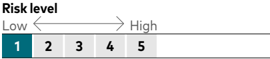

Processing Documents:   2%|▏         | 5/297 [00:33<32:27,  6.67s/it]2025-10-04 14:51:12,877 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-04 14:51:12,881 - INFO - Going to convert document batch...
2025-10-04 14:51:12,882 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-10-04 14:51:12,882 - INFO - Accelerator device: 'cuda:0'


SAVED: Short-Term_Bond_Index_Fund_Admiral__factSheet_risk_gauge.png with label 1


2025-10-04 14:51:14,455 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:51:15,330 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:51:15,817 - INFO - Processing document Long-Term_Investment-Grade_Fund_Investor__factSheet.pdf
2025-10-04 14:51:18,014 - INFO - Finished converting document Long-Term_Investment-Grade_Fund_Investor__factSheet.pdf in 5.14 sec.


Processing: Long-Term_Investment-Grade_Fund_Investor__factSheet.pdf


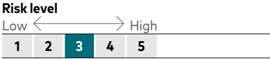

Processing Documents:   2%|▏         | 6/297 [00:40<32:46,  6.76s/it]2025-10-04 14:51:19,806 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-04 14:51:19,810 - INFO - Going to convert document batch...
2025-10-04 14:51:19,811 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-10-04 14:51:19,812 - INFO - Accelerator device: 'cuda:0'


SAVED: Long-Term_Investment-Grade_Fund_Investor__factSheet_risk_gauge.png with label 3


2025-10-04 14:51:21,481 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:51:22,391 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:51:22,876 - INFO - Processing document Tax-Managed_Capital_Appreciation_Fund_Institutional__factSheet.pdf
2025-10-04 14:51:25,077 - INFO - Finished converting document Tax-Managed_Capital_Appreciation_Fund_Institutional__factSheet.pdf in 5.27 sec.


Processing: Tax-Managed_Capital_Appreciation_Fund_Institutional__factSheet.pdf


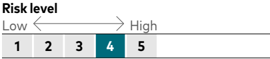

Processing Documents:   2%|▏         | 7/297 [00:47<32:40,  6.76s/it]2025-10-04 14:51:26,570 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-04 14:51:26,576 - INFO - Going to convert document batch...
2025-10-04 14:51:26,577 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-10-04 14:51:26,578 - INFO - Accelerator device: 'cuda:0'


SAVED: Tax-Managed_Capital_Appreciation_Fund_Institutional__factSheet_risk_gauge.png with label 4


2025-10-04 14:51:28,213 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:51:29,019 - INFO - Accelerator device: 'cuda:0'
2025-10-04 14:51:29,419 - INFO - Processing document Small-Cap_Value_Index_Fund_Admiral__factSheet.pdf
2025-10-04 14:51:31,603 - INFO - Finished converting document Small-Cap_Value_Index_Fund_Admiral__factSheet.pdf in 5.04 sec.


Processing: Small-Cap_Value_Index_Fund_Admiral__factSheet.pdf


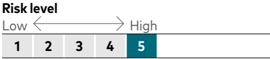

Invalid input. Please enter a number from 1-7 or 's' to skip.


Processing Documents:   3%|▎         | 8/297 [01:02<46:27,  9.64s/it]2025-10-04 14:51:42,390 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-04 14:51:42,416 - INFO - Going to convert document batch...
2025-10-04 14:51:42,417 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-10-04 14:51:42,418 - INFO - Accelerator device: 'cuda:0'


SAVED: Small-Cap_Value_Index_Fund_Admiral__factSheet_risk_gauge.png with label 2


Processing Documents:   3%|▎         | 8/297 [01:03<38:23,  7.97s/it]


KeyboardInterrupt: 

In [ ]:
    
import time
from pathlib import Path
from docling.datamodel.base_models import InputFormat
from docling_core.types.doc import ImageRefMode
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.pipeline_options import PdfPipelineOptions, TableFormerMode, EasyOcrOptions, TesseractOcrOptions, OcrMacOptions
from docling.datamodel.settings import settings
from IPython.display import display, Markdown

import fitz  # PyMuPDF
from pypdfium2._helpers.misc import PdfiumError
from io import BytesIO
from tqdm import tqdm
def parse_document(doc_path: Path):


    IMAGE_RESOLUTION_SCALE = 2.0

    # Define pipeline options for PDF processing
    pipeline_options = PdfPipelineOptions(
        do_table_structure=True,  
        
        
        table_structure_options=dict(
            do_cell_matching=True,  # Use text cells predicted from table structure model
            mode=TableFormerMode.ACCURATE  # Use more accurate TableFormer model
        ),
        generate_page_images=True,  # Enable page image generation
        generate_picture_images=True,  # Enable picture image generation
        images_scale=IMAGE_RESOLUTION_SCALE, # Set image resolution scale (scale=1 corresponds to a standard 72 DPI image)
    
        
    )

    # Initialize the DocumentConverter with the specified pipeline options
    doc_converter_global = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
        }
    )


    try:
        result = doc_converter_global.convert(doc_path)
    
    except Exception as e:
        try:
            # Open with PyMuPDF and save to an in-memory buffer
            pdf_bytes = Path(doc_path).read_bytes()
            pdf_doc = fitz.open(stream=pdf_bytes, filetype="pdf")
            
            output_buffer = BytesIO()
            pdf_doc.save(output_buffer)
            output_buffer.seek(0)
            
            # Retry conversion with the repaired PDF bytes
            result = doc_converter_global.convert(output_buffer)
            
        except Exception as e_inner:
            
            raise e_inner # Re-raise the exception if the fallback also fails

    return result

def create_training_dataset(input_folder: str, output_folder: str, crop_width_percent: float = 0.15):
    """
    Parses documents, extracts and crops images, and prompts for labels to create a fine-tuning dataset.
    """
    # --- 1. Configuration ---
    input_path = Path(input_folder)
    output_images_path = Path(output_folder) / "images"
    labels_file_path = Path(output_folder) / "labels.jsonl"

    # Create output directories if they don't exist
    output_images_path.mkdir(parents=True, exist_ok=True)
    
   
    # --- 2. Find all relevant documents ---
    all_pdfs = input_path.glob("*.pdf")

    # Filter for files where the name contains BOTH "factsheet" and "fund"
    # We use .lower() to make the search case-insensitive
    files_to_process = [
        f for f in all_pdfs 
        if "factsheet" in f.name.lower() and "fund" in f.name.lower()
    ]

    # --- 3. Main Processing Loop ---
    for doc_path in tqdm(files_to_process, desc="Processing Documents"):
        try:
            # Parse the document with Docling
            result = parse_document(doc_path)
            
            picture_count = 0
            table_count = 0

            image = None
            for element, _level in result.document.iterate_items():
                if hasattr(element, 'get_image'):
                    if 'picture' in str(type(element)).lower():
                        picture_count += 1
                        
                    elif 'table' in str(type(element)).lower():
                        table_count += 1
                        if table_count == 1:
                            image = element.get_image(result.document)

          
            
            width, height = image.size
            crop_box = (0, 0, int(width * crop_width_percent), height)
            cropped_image = image.crop(crop_box)
            
            # --- 5. Interactive Labeling ---
           
            print(f"Processing: {doc_path.name}")
            display(cropped_image) # Show the user the image to label
            
            label = ""
            while not label:
                user_input = input("Enter the highlighted risk level (e.g., '4', or 's' to skip): ")
                if user_input.lower() == 's':
                    tqdm.write(f"SKIPPED: {doc_path.name}")
                    label = "skip"
                elif user_input.isdigit() and 1 <= int(user_input) <= 7:
                    label = int(user_input)
                else:
                    print("Invalid input. Please enter a number from 1-7 or 's' to skip.")

            if label == "skip":
                continue

            # --- 6. Save Image and Label ---
            # Save the cropped image
            image_filename = f"{doc_path.stem}_risk_gauge.png"
            cropped_image.save(output_images_path / image_filename)
            
            # Create the JSONL entry for the label file
            label_entry = {
                "id": doc_path.stem,
                "image": image_filename,
                "conversations": [
                    {"from": "human", "value": "<image>\nIdentify the highlighted number on the 'Risk level' scale. Return a JSON object with the key 'risk_level'."},
                    {"from": "gpt", "value": f'{{"risk_level": {label}}}'}
                ]
            }
            
            # Append the label to the .jsonl file
            with open(labels_file_path, 'a') as f:
                f.write(json.dumps(label_entry) + '\n')
            
            tqdm.write(f"SAVED: {image_filename} with label {label}")

        except Exception as e:
            tqdm.write(f"ERROR processing {doc_path.name}: {e}")
            
    
    print("\n--- Dataset Creation Complete! ---")
    print(f"Check the '{output_folder}' directory for your images and labels.jsonl file.")


# --- Run the script ---
INPUT_FOLDER = "../data/output/"
OUTPUT_FOLDER = "train_dataset"
create_training_dataset(INPUT_FOLDER, OUTPUT_FOLDER)

Now we are going to process the ETF documents factSheet

2025-10-03 11:52:50,319 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-03 11:52:50,331 - INFO - Going to convert document batch...
2025-10-03 11:52:50,333 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-10-03 11:52:50,336 - INFO - Accelerator device: 'cuda:0'
2025-10-03 11:52:52,366 - INFO - Accelerator device: 'cuda:0'
2025-10-03 11:52:53,332 - INFO - Accelerator device: 'cuda:0'
2025-10-03 11:52:53,855 - INFO - Processing document S&P_500_ETF_factSheet.pdf
2025-10-03 11:52:56,233 - INFO - Finished converting document S&P_500_ETF_factSheet.pdf in 5.92 sec.


### Table

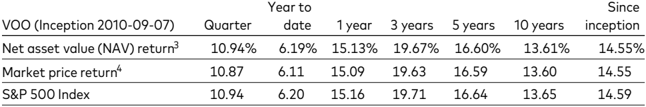

### Picture

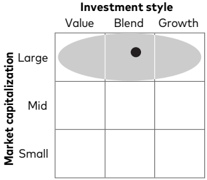

### Table

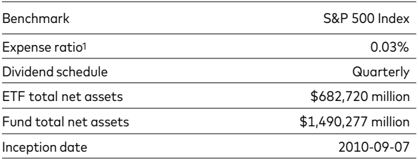

### Table

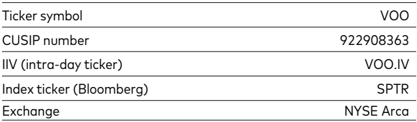

### Picture

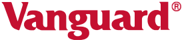

### Picture

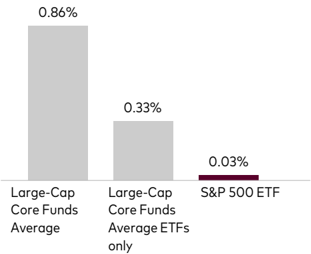

### Table

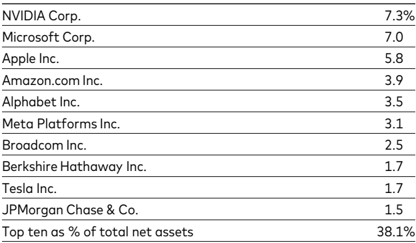

### Table

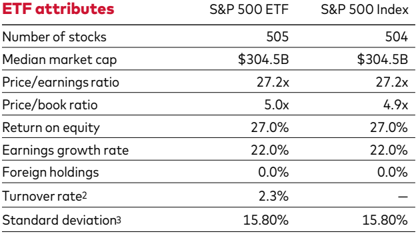

### Table

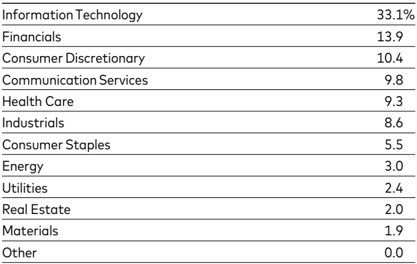

Pictures found: 3
Tables found: 6


2025-10-03 11:55:05,506 - INFO - HTTP Request: POST http://127.0.0.1:11434/api/generate "HTTP/1.1 200 OK"
2025-10-03 11:57:17,490 - INFO - HTTP Request: POST http://127.0.0.1:11434/api/generate "HTTP/1.1 200 OK"


## Vanguard S&amp;P 500 ETF    |  VOO

As of June 30, 2025

## Investment approach

- Seeks to track the performance of the S&amp;P 500 Index.
- Large-cap equity.
- Employs a passively managed, full-replication  strategy.
- Fund remains fully invested.
- Low expenses minimize net tracking error.

## About the benchmark

- The S&amp;P 500 Index is a widely recognized benchmark of U.S. stock market performance that is dominated by the stocks of large U.S. companies.
- The index includes 500 leading companies in leading industries of the U.S. economy.

## Performance history

Total returns   2  for period ended June 30, 2025

| VOO(Inception 2010-09-07)      | Quarter   | Year to date   | 1 year   | 3 years   | 5 years   | 10 years   | Since inception   |
|--------------------------------|-----------|----------------|----------|-----------|-----------|------------|-------------------|
| Net asset value (NAV) return 3 | 10.94%    | 6.19%          | 15.13%   | 19.67%    | 16.60%    | 13.61%

In [ ]:
etf_path = "../data/output/S&P_500_ETF_factSheet.pdf"
fund_path = "../data/output/Windsor_Fund_Investor__factSheet.pdf"


import time
from pathlib import Path
from docling.datamodel.base_models import InputFormat
from docling_core.types.doc import ImageRefMode
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.pipeline_options import PdfPipelineOptions, TableFormerMode, EasyOcrOptions, TesseractOcrOptions, OcrMacOptions
from docling.datamodel.settings import settings
from IPython.display import display, Markdown


IMAGE_RESOLUTION_SCALE = 2.0

# Define pipeline options for PDF processing
pipeline_options = PdfPipelineOptions(
    do_table_structure=True,  
     
    
    table_structure_options=dict(
        do_cell_matching=True,  # Use text cells predicted from table structure model
        mode=TableFormerMode.ACCURATE  # Use more accurate TableFormer model
    ),
    generate_page_images=True,  # Enable page image generation
    generate_picture_images=True,  # Enable picture image generation
    images_scale=IMAGE_RESOLUTION_SCALE, # Set image resolution scale (scale=1 corresponds to a standard 72 DPI image)
   
    
)

# Initialize the DocumentConverter with the specified pipeline options
doc_converter_global = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

result = doc_converter_global.convert(etf_path)


# Count extracted images
picture_count = 0
table_count = 0

images = []
for element, _level in result.document.iterate_items():
    if hasattr(element, 'get_image'):
        if 'picture' in str(type(element)).lower():
            picture_count += 1
            display(Markdown("### Picture"))
            display(element.get_image(result.document))
            images.append(element)
        elif 'table' in str(type(element)).lower():
            display(Markdown("### Table"))
            display(element.get_image(result.document))
            table_count += 1

print(f"Pictures found: {picture_count}")
print(f"Tables found: {table_count}")

from simple_rag.parsers.docling_parser import DoclingParserProcessor
from IPython.display import display, Markdown
docling_parser = DoclingParserProcessor()
# Display the images
from IPython.display import Image
summaries = []


summaries.append(docling_parser.obtain_image_summary_specific(images[2].get_image(result.document),prompt="Extract data from the chart about the expenses ratio comparison of this ETF compare to others" )) 



text = result.document.export_to_markdown()
print(text)

# Now lets add below the image labels the corresponding summary


image_tag = '<!-- image -->'

parts = text.split(image_tag)
target_parts = [2]
result_parts = []
for i, part in enumerate(parts):
    if i in target_parts:
        result_parts.append(part +image_tag + "\n\n" + summaries.pop(0))
    else:
        result_parts.append(part)
# 
# 
print("\n\n".join(result_parts)) 
text = "\n\n".join(result_parts)


In [16]:
from docling.datamodel.settings import settings
from simple_rag.parsers.docling_parser import DoclingParserProcessor



parser = DoclingParserProcessor()


INPUT_FOLDER = "../data/output/"
OUTPUT_FOLDER = "../data/processed/markdowns/"
parser.process_factsheet_folder(INPUT_FOLDER, OUTPUT_FOLDER)




[docling] Found 507 factSheet documents in ../data/output


Processing factSheets:   0%|          | 0/507 [00:00<?, ?it/s]2025-10-04 14:15:53,198 - INFO - HTTP Request: POST http://127.0.0.1:11434/api/generate "HTTP/1.1 200 OK"
2025-10-04 14:18:27,387 - INFO - HTTP Request: POST http://127.0.0.1:11434/api/generate "HTTP/1.1 200 OK"
Processing factSheets:   0%|          | 0/507 [11:57<?, ?it/s]


KeyboardInterrupt: 

# Generate the Embeddings

We are going to use the embedding model BGE-large-en-v1.5 from the Hugging Face Hub to generate embeddings for the parsed document chunks. This embedding from the Beijing Academy of Artificial Intelligence (BAAI) is a really powerfull embedding model.

In [85]:

from simple_rag.embeddings.embedding import EmbedData

# 1. Initialize the EmbedData class with BGE model
model_name = "BAAI/bge-large-en-v1.5"
batch_size = 64

print("Initializing BGE embedding model...")
embed_model = EmbedData(model_name=model_name, batch_size=batch_size)
print("Model loaded successfully.")

# 2. Extract combined_text from processed chunks
text_chunks = processed_content.get('text_chunks', [])
image_chunks = processed_content.get('image_chunks', [])

print(f"\n📄 Preparing {len(text_chunks)} text chunks for embedding...")

# Extract the combined text from each chunk and create structured data
documents = []
structured_data = []

for i, chunk in enumerate(text_chunks):
    combined_text = chunk.get('combined_text', '')
    if combined_text.strip():  # Only include non-empty chunks
        documents.append(combined_text)
        
        # Structure data according to your Qdrant format
        chunk_data = {
            'text': combined_text,
            'source_document': 'processed_document.pdf',  # You can modify this based on your source
            'page_number': chunk.get('page', 'unknown'),
            'chunk_type': 'Text',
            'section_title': chunk.get('section_title', f'chunk_{i}')  # Using chunk_id as section title
        }
        structured_data.append(chunk_data)

# Also include image chunks with AI summaries
for i, img_chunk in enumerate(image_chunks):
    ai_summary = img_chunk.get('ai_summary', '')
    if ai_summary.strip():
        image_text = f"[IMAGE] {ai_summary}"
        documents.append(image_text)
        
        img_data = {
            'text': image_text,
            'source_document': 'processed_document.pdf',
            'page_number': img_chunk.get('page', 'unknown'),
            'chunk_type': 'Image',
            'section_title': img_chunk.get('section_title', f'image_{i}')
        }
        structured_data.append(img_data)

print(f"📊 Total documents to embed: {len(documents)}")
print(f"   - Text chunks: {len([d for d in structured_data if d['chunk_type'] == 'Text'])}")
print(f"   - Image chunks: {len([d for d in structured_data if d['chunk_type'] == 'Image'])}")

# 3. Embed the documents
print("\n🔄 Generating embeddings...")
embedding_vectors = embed_model.embed(documents)

# 4. Create the final embeddings structure for Qdrant storage
embeddings = []
for i, (vector, data) in enumerate(zip(embed_model.embeddings, structured_data)):
    embedding_entry = {
        'vector': {
            'text_vector': vector  # The dense vector with your exact field name
        },
        'payload': {
            'text': data['text'],
            'source_document': data['source_document'],
            'page_number': data['page_number'],
            'chunk_type': data['chunk_type'],
            'section_title': data['section_title']
        }
    }
    embeddings.append(embedding_entry)

# 5. Inspect the output
print(f"\n✅ Embedding generation complete.")
print(f"📊 Total embeddings created: {len(embeddings)}")
print(f"   - Embedding dimension: {len(embeddings[0]['vector']['text_vector']) if embeddings else 0}")

# Show sample information
print(f"\n📋 Sample embedding structure:")
for i in range(min(3, len(embeddings))):
    entry = embeddings[i]
    payload = entry['payload']
    
    print(f"   Entry {i+1}:")
    print(f"      Vector shape: {len(entry['vector']['text_vector'])}")
    print(f"      Source document: {payload['source_document']}")
    print(f"      Page number: {payload['page_number']}")
    print(f"      Chunk type: {payload['chunk_type']}")
    print(f"      Section title: {payload['section_title']}")
    



2025-09-24 16:40:12,685 - INFO - Load pretrained SentenceTransformer: BAAI/bge-large-en-v1.5


Initializing BGE embedding model...


2025-09-24 16:40:16,831 - INFO - 1 prompt is loaded, with the key: query


Model loaded successfully.

📄 Preparing 31 text chunks for embedding...
📊 Total documents to embed: 49
   - Text chunks: 31
   - Image chunks: 18

🔄 Generating embeddings...


Embedding data in batches: 1it [00:01,  1.71s/it]


✅ Embedding generation complete.
📊 Total embeddings created: 49
   - Embedding dimension: 1024

📋 Sample embedding structure:
   Entry 1:
      Vector shape: 1024
      Source document: processed_document.pdf
      Page number: 1
      Chunk type: Text
      Section title: IUSE
   Entry 2:
      Vector shape: 1024
      Source document: processed_document.pdf
      Page number: 1
      Chunk type: Text
      Section title: iShares S&P 500 EUR Hedged UCITS ETF (Acc) Euro (Accumulating) iShares V plc
   Entry 3:
      Vector shape: 1024
      Source document: processed_document.pdf
      Page number: 1
      Chunk type: Text
      Section title: August 2025


In [86]:
image_chunks[2]

{'chunk_id': 'image_3_10',
 'original_chunk_id': 3,
 'page': 1,
 'type': 'image',
 'text': '[IMAGE: No relevant information]',
 'source_document': 'sp500EUR.pdf',
 'section_title': 'Image Content',
 'image_data': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAAcA7YDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2N

# Define the vector database

In [87]:

command = "docker run -p 6333:6333 -p 6334:6334 \
    -v $(pwd)/qdrant_storage:/qdrant/storage:z \
        qdrant/qdrant"

subprocess.Popen(command, shell=True)

<Popen: returncode: None args: 'docker run -p 6333:6333 -p 6334:6334     -v ...>

Now we are going to load the embeddings in the Qdrant database

In [88]:
from simple_rag.database.qdrant import QdrantDatabase

database = QdrantDatabase(collection_name="unstructured_parsing")

database.create_collection()
database.batch_upsert(embeddings)

           _                 _    
  __ _  __| |_ __ __ _ _ __ | |_  
 / _` |/ _` | '__/ _` | '_ \| __| 
| (_| | (_| | | | (_| | | | | |_  
 \__, |\__,_|_|  \__,_|_| |_|\__| 
    |_|                           

Version: 1.15.4, build: 20db14f8
Access web UI at http://localhost:6333/dashboard

2025-09-24T14:40:19.754233Z  INFO storage::content_manager::consensus::persistent: Loading raft state from ./storage/raft_state.json    
2025-09-24T14:40:19.771428Z  INFO storage::content_manager::toc: Loading collection: unstructured_parsing    
2025-09-24T14:40:19.866980Z  INFO collection::shards::local_shard: Recovering shard ./storage/collections/unstructured_parsing/0: 0/1 (0%)    
2025-09-24T14:40:19.880067Z  INFO collection::shards::local_shard: Recovered collection unstructured_parsing: 1/1 (100%)    
2025-09-24T14:40:19.885786Z  INFO qdrant: Distributed mode disabled    
2025-09-24T14:40:19.886470Z  INFO qdrant: Telemetry reporting enabled, id: f3bec509-fe06-491e-a6c7-14b01ff33e2d    
202

Ingesting in batches: 100%|██████████| 1/1 [00:00<00:00, 19.02it/s]

2025-09-24T14:40:20.293608Z  INFO storage::content_manager::toc::collection_meta_ops: Updating collection unstructured_parsing    


Now lets try the retriever functionality

In [89]:

from simple_rag.retriever.retriever import Retriever

retriever = Retriever(vector_db=database, embeddata=embed_model)

# Step 2: Search for "data engineering"
results = retriever.search("What is the fund's risk rating on the scale of 1 to 7?")



Execution time for the search: 0.0079 seconds


In [90]:
results

[ScoredPoint(id=9, version=6, score=0.6954931616783142, payload={'chunk_type': 'Text', 'text': 'Higher Risk\nFund Launch Date : 30-Sept-2010 Potentially Lower Rewards Potentially Higher Rewards Fund Base Currency : EUR Net Assets of Fund (M) : 7,470.46 EUR Ee ee ee ee SFDR Classification : Other Domicile : Ireland\nCAPITAL AT RISK: The value of investments and the income from them can fall as well as rise and are not guaranteed. Investors may not get back the amount originally invested. Methodology : Replicated Issuing Company : iShares V plc', 'page_number': 1, 'source_document': 'processed_document.pdf', 'section_title': 'Higher Risk'}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=3, version=6, score=0.6722439527511597, payload={'chunk_type': 'Text', 'text': 'FUND OVERVIEW', 'page_number': 1, 'section_title': 'FUND OVERVIEW', 'source_document': 'processed_document.pdf'}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=41, version=6, score=0.65184020

Finally, we use the RAG class to augment the data with context and generate answers to the questions.

In [91]:

from simple_rag.rag.rag import RAG
retriever = Retriever(database, embed_model)

rag = RAG(retriever, "llama3.2:3b")

LLM loaded successfully


In [92]:
query = "What was the 2023 performance of the fund"

answer = rag.query(query)

2025-09-24 16:40:20,764 - INFO - HTTP Request: POST http://localhost:11434/api/show "HTTP/1.1 200 OK"


Execution time for the search: 0.0026 seconds
Section: CALENDAR YEAR PERFORMANCE score: 0.6624170541763306
Section: FUND OVERVIEW score: 0.6619502305984497
Section: SECTOR BREAKDOWN (%) score: 0.6331368684768677
Section: Price to Earnings Ratio : 28.90x score: 0.6253678798675537
Section: August 2025 score: 0.625239372253418
[GIN] 2025/09/24 - 16:40:20 | 200 |   80.528028ms |       127.0.0.1 | POST     "/api/show"


time=2025-09-24T16:40:21.177+02:00 level=INFO source=sched.go:540 msg="updated VRAM based on existing loaded models" gpu=GPU-4069aba5-7480-ee05-1c29-f707b840cb92 library=cuda total="8.0 GiB" available="2.6 GiB"
llama_model_loader: loaded meta data with 30 key-value pairs and 255 tensors from /home/alvar/.ollama/models/blobs/sha256-dde5aa3fc5ffc17176b5e8bdc82f587b24b2678c6c66101bf7da77af9f7ccdff (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Llama 3.2 3B Instruct
llama_model_loader: - kv   3:                           general.finetune str              = Instruct
llama_model_loader: - kv   4:                           general.ba

[GIN] 2025/09/24 - 16:41:24 | 200 |          1m5s |       127.0.0.1 | POST     "/api/chat"


In [93]:
from IPython.display import display, Markdown

display(Markdown(answer["answer"]))

The 2023 performance of the fund is -7.69%.

# Evaluation

In [94]:
from datasets import Dataset
from ragas import evaluate
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_precision,
    context_recall,

    answer_correctness,  # compares answer vs references
)

import json


json_path = "../src/simple_rag/evaluation/pair_answers.json"  

with open(json_path, "r", encoding="utf-8") as f:
    raw = json.load(f)

len(raw), raw[0]



(42,
 {'question': "What is the name of the network architecture proposed in the 'Attention Is All You Need' paper?",
  'ground_truth': 'The paper proposes a new simple network architecture called the Transformer. [cite: 17]',
  'question_type': 'Simple Fact',
  'ground_truth_context_ids': [17]})

In [95]:
import pandas as pd
from tqdm import tqdm
from datasets import Dataset
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
)

# LlamaIndex and Corrected Ragas adapter imports for OLDER versions
from llama_index.llms.ollama import Ollama
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from ragas.llms import LlamaIndexLLMWrapper
from ragas.embeddings import LlamaIndexEmbeddingsWrapper
embedder = embed_model.model
# Create a Ragas-compatible wrapper around your LlamaIndex object
ragas_embeddings = LlamaIndexEmbeddingsWrapper(embeddings=embedder)

evaluation_data = []

for item in tqdm(raw, desc="Evaluating RAG"):
    q = (item.get("question") or "").strip()
    gt = item.get("ground_truth", [])
    answer = rag.query(q)
    answer_rag = answer.get("answer")
    context_rag = answer.get("contexts", [])

    evaluation_data.append({
        "question": q,
        "ground_truth": gt,
        "answer": answer_rag,
        "contexts": context_rag,
    })

print("\nDataset generation complete!")

# --- 3. Convert to a Hugging Face Dataset and display ---

evaluation_dataset_hf = Dataset.from_list(evaluation_data)

print("\nGenerated Hugging Face Dataset:")
print(evaluation_dataset_hf)

print("\nDataFrame Preview:")
print(pd.DataFrame(evaluation_dataset_hf))    

/tmp/ipykernel_66558/1289497984.py:19: DeprecationWarning: LlamaIndexEmbeddingsWrapper is deprecated and will be removed in a future version. Use the modern embedding providers instead: embedding_factory('openai', model='text-embedding-3-small', client=openai_client) or from ragas.embeddings import OpenAIEmbeddings, GoogleEmbeddings, HuggingFaceEmbeddings
  ragas_embeddings = LlamaIndexEmbeddingsWrapper(embeddings=embedder)
Evaluating RAG:   0%|          | 0/42 [00:00<?, ?it/s]

Execution time for the search: 0.0894 seconds
Section: Image Content score: 0.5107421875
Section: Image Content score: 0.4981762170791626
Section: Image Content score: 0.47366881370544434
Section: IUSE score: 0.47345203161239624
Section: FUND OVERVIEW score: 0.4655793309211731


2025-09-24 16:41:35,643 - INFO - HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
Evaluating RAG:   2%|▏         | 1/42 [00:08<05:48,  8.49s/it]

[GIN] 2025/09/24 - 16:41:35 | 200 |  5.337362755s |       127.0.0.1 | POST     "/api/chat"
Execution time for the search: 0.0047 seconds
Section: Image Content score: 0.45765671133995056
Section: SECTOR BREAKDOWN (%) score: 0.45124536752700806
Section: Image Content score: 0.4483691155910492
Section: Image Content score: 0.444050669670105
Section: Image Content score: 0.43088704347610474


2025-09-24 16:41:56,167 - INFO - HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
Evaluating RAG:   5%|▍         | 2/42 [00:29<10:22, 15.57s/it]

[GIN] 2025/09/24 - 16:41:56 | 200 | 19.748741923s |       127.0.0.1 | POST     "/api/chat"
Execution time for the search: 0.0047 seconds
Section: Image Content score: 0.47810742259025574
Section: Image Content score: 0.47087979316711426
Section: Image Content score: 0.46609780192375183
Section: Image Content score: 0.46609780192375183
Section: Image Content score: 0.4660976827144623


2025-09-24 16:42:03,745 - INFO - HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
Evaluating RAG:   7%|▋         | 3/42 [00:36<07:44, 11.92s/it]

[GIN] 2025/09/24 - 16:42:03 | 200 |   5.05016982s |       127.0.0.1 | POST     "/api/chat"
Execution time for the search: 0.0054 seconds
Section: Image Content score: 0.5537780523300171
Section: Image Content score: 0.5214225649833679
Section: Image Content score: 0.5197697877883911
Section: Image Content score: 0.5089243650436401
Section: Price to Earnings Ratio : 28.90x score: 0.5059313178062439


2025-09-24 16:42:08,939 - INFO - HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
Evaluating RAG:  10%|▉         | 4/42 [00:41<05:52,  9.26s/it]

[GIN] 2025/09/24 - 16:42:08 | 200 |  3.961759513s |       127.0.0.1 | POST     "/api/chat"
Execution time for the search: 0.0038 seconds
Section: Image Content score: 0.5405442714691162
Section: Image Content score: 0.5345730185508728
Section: Image Content score: 0.5179349184036255
Section: Image Content score: 0.5086687803268433
Section: Image Content score: 0.5020403265953064


Evaluating RAG:  10%|▉         | 4/42 [00:48<07:41, 12.14s/it]time=2025-09-24T16:42:15.703+02:00 level=ERROR source=server.go:1444 msg="post predict" error="Post \"http://127.0.0.1:42705/completion\": context canceled"



[GIN] 2025/09/24 - 16:42:15 | 500 |  5.381324888s |       127.0.0.1 | POST     "/api/chat"


KeyboardInterrupt: 

In [ ]:
from llama_index.llms.ollama import Ollama
from ragas.llms import LlamaIndexLLM as RagasLILLM
critic_model = "mistral:7b"
li_llm = Ollama(model=critic_model, request_timeout=120.0)
ragas_critic_llm = RagasLILLM(li_llm)
metrics = [
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision
]


# Run the evaluation
print(f"\nStarting evaluation with critic LLM '{critic_llm_model}'...")

result = evaluate(
    dataset=evaluation_dataset_hf,
    metrics=metrics,
    llm=ragas_critic_llm,
    embeddings=ragas_embeddings
)

print("\nEvaluation complete!")
df_results = result.to_pandas()
print(df_results)

ImportError: cannot import name 'LlamaIndexLLM' from 'ragas.llms' (/home/alvar/anaconda3/envs/rag-env/lib/python3.10/site-packages/ragas/llms/__init__.py)